## Image Classification dùng VGG-16

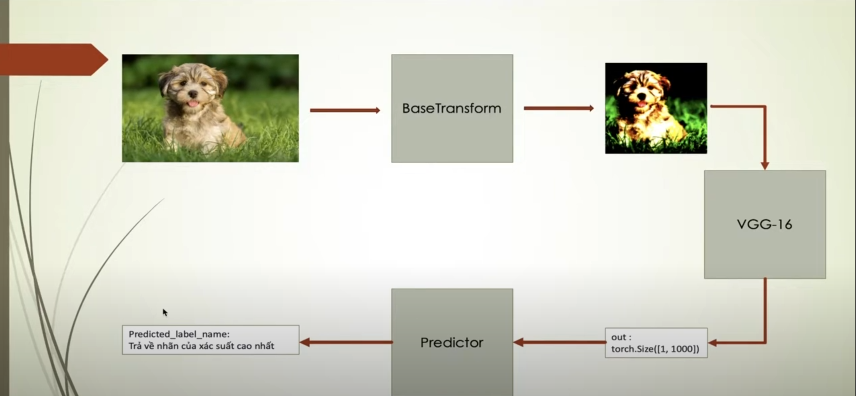

In [6]:
import numpy as np
import torch
import torchvision
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import json

In [2]:
print("Pytorch version ", torch.__version__ )
print("Torchvision version ", torchvision.__version__)

Pytorch version  2.3.1
Torchvision version  0.18.1


In [3]:
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)
net.eval()
print(net)

c:\Users\DUYEN\anaconda3\envs\py38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\DUYEN\anaconda3\envs\py38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [4]:
class BaseTransform():
    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])

    def __call__(self, img):
        return self.base_transform(img)

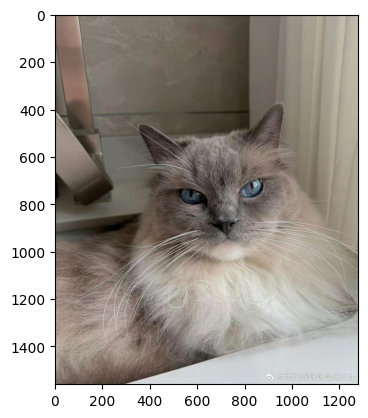

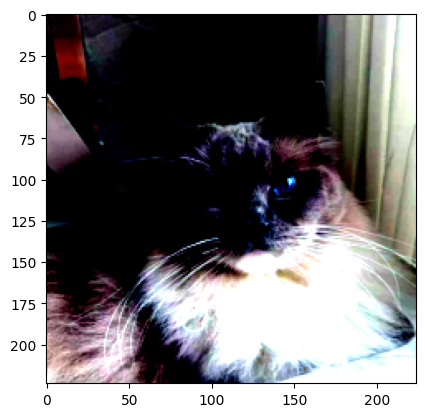

In [5]:
image_file_path = "./data/cat.jpg"
img = Image.open(image_file_path)

plt.imshow(img)
plt.show()

resize = 224
# search mean và std của imagenet vì đang sử dụng model của tập dữ liệu dùng imagenet
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform = BaseTransform(resize, mean, std)       # tao transform
img_transformed = transform(img)

# (chanels, height, width) -> (height, width, chanels)
# clip(0,1)
img_transformed = img_transformed.numpy().transpose(1,2,0)
img_transformed = np.clip(img_transformed, 0, 1)

plt.imshow(img_transformed)
plt.show()

In [10]:
class Predictor():
    def __init__(self, class_index):
        self.class_index = class_index

    def predict_max(self, out):
        maxid = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)]

        return predicted_label_name
    

In [11]:
class_index = json.load(open('./imagenet_class_index.json', 'r'))

In [12]:
predictor = Predictor(class_index)

In [13]:
image_file_path = './data/cat.jpg'
img = Image.open(image_file_path)

resize = 224
# search mean và std của imagenet vì đang sử dụng model của tập dữ liệu dùng imagenet
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)
# img_transformed.shape
# để đưa vào mạng vgg thì cần thêm 1 chiều bên trái
img_transformed = img_transformed.unsqueeze_(0)
# img_transformed.shape
out = net(img_transformed)
result = predictor.predict_max(out)
print("Result is: ", result)

Result is:  ['n02127052', 'lynx']
